# Dataset Analysis 3: Censoring

Experimenting with ways to deal with the right-censoring of death dates (and therefore survival time).

When "Death"==0, "Date of death" is equal to the last known date in which the subject was alive and "Survival time" is therefore a lower bound on the actual survival time.

In [1]:
import pandas as pd
import numpy as np
from datasets import *
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Drop rows with censored survtime

In [2]:
dogs = load_df_dogs_2016(dropColumns=dropNonNumeric+dropDates+dropIrrelevant+["Dead"], NApolicy='normal', censoringPolicy='drop')
dogs.shape

(118, 17)

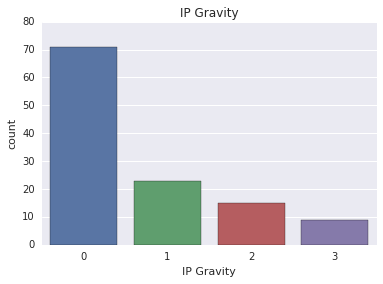

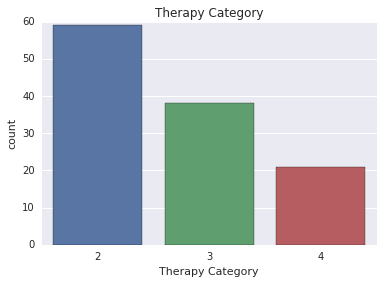

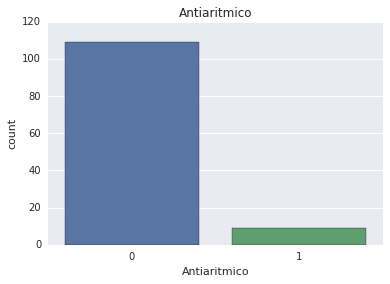

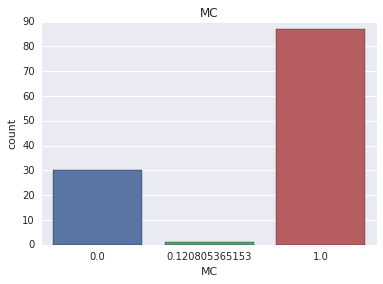

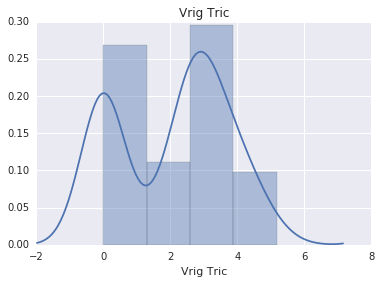

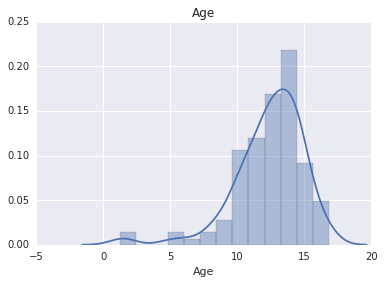

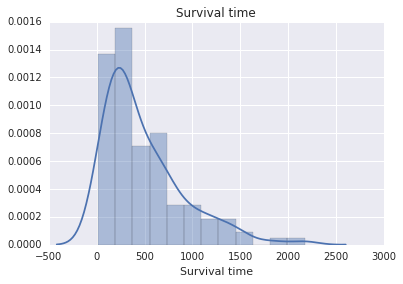

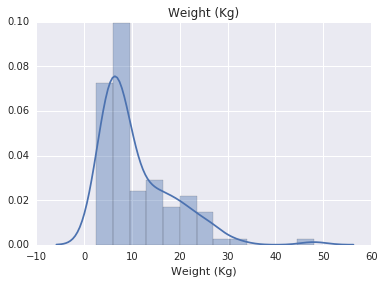

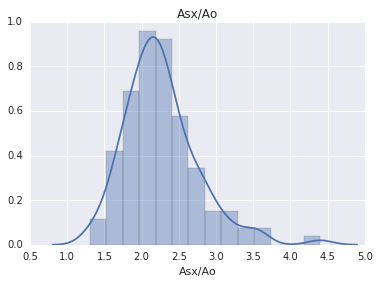

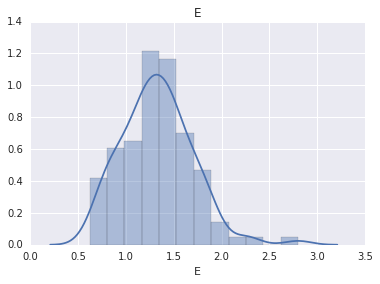

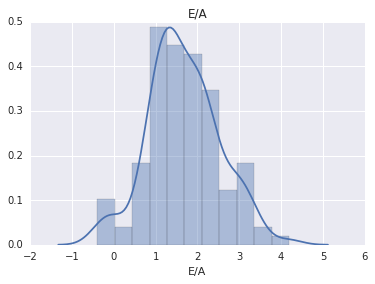

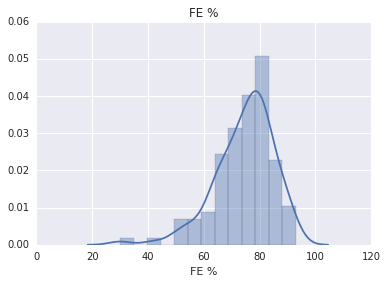

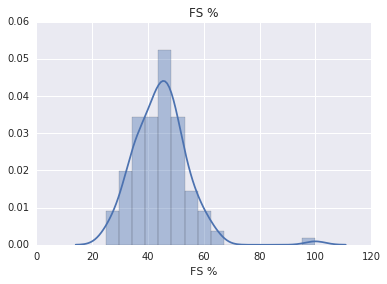

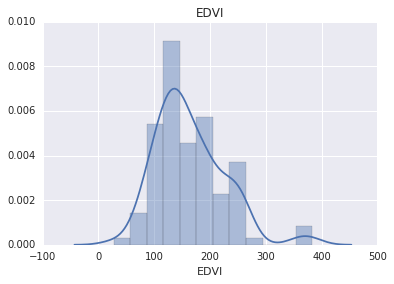

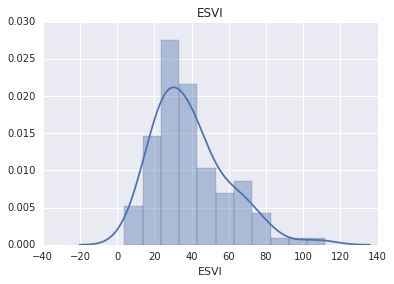

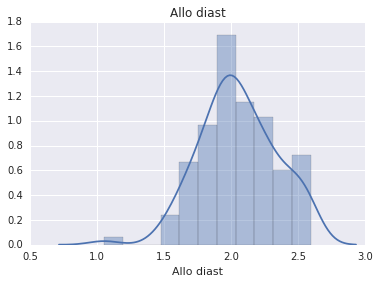

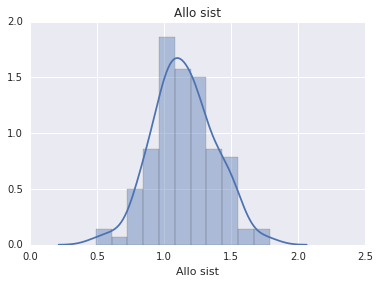

In [3]:
for categ_feat in ["IP Gravity", "Therapy Category", "Antiaritmico", "MC"]:
    plt.title(categ_feat)
    sns.countplot(x=categ_feat, data=dogs)
    plt.show()
for feat in ["Vrig Tric", "Age", "Survival time", "Weight (Kg)", "Asx/Ao", "E", "E/A", "FE %", "FS %", "EDVI", "ESVI", "Allo diast", "Allo sist"]:
    plt.title(feat)
    sns.distplot(dogs[feat])
    plt.show()

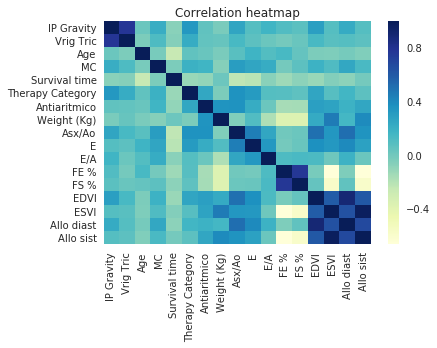

In [4]:
plt.title("Correlation heatmap")
sns.heatmap(dogs.corr(), cmap="YlGnBu")
plt.show()

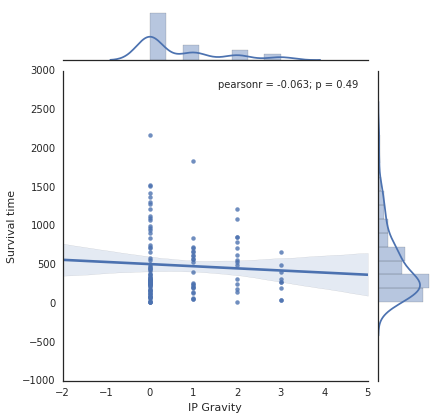

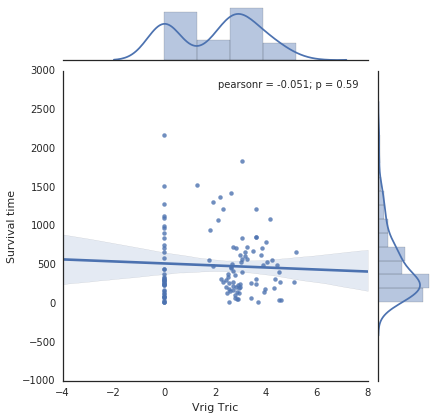

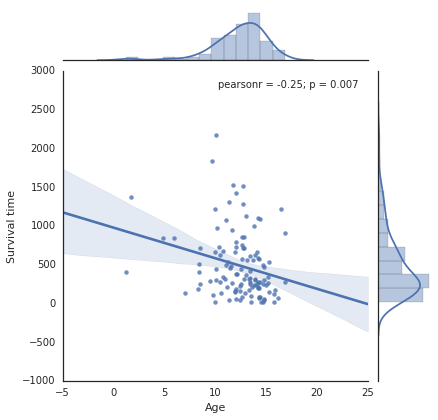

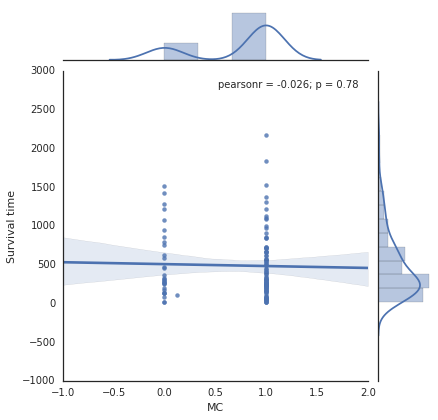

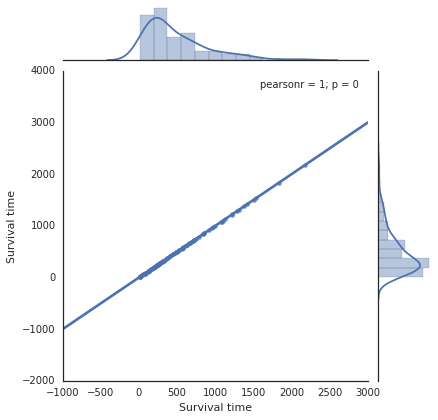

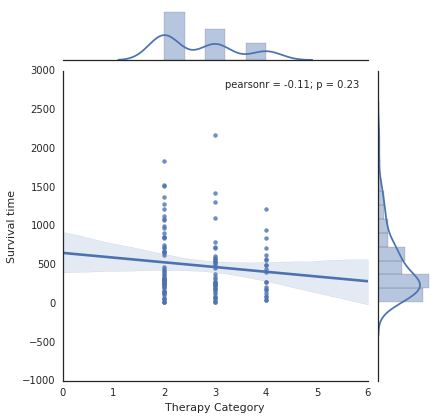

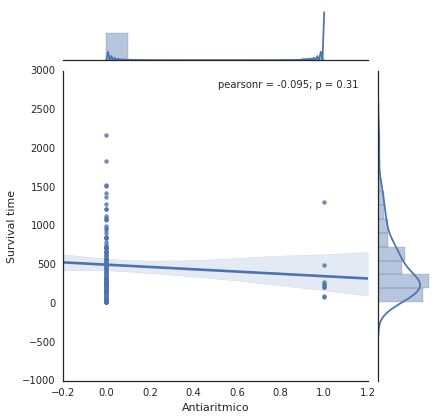

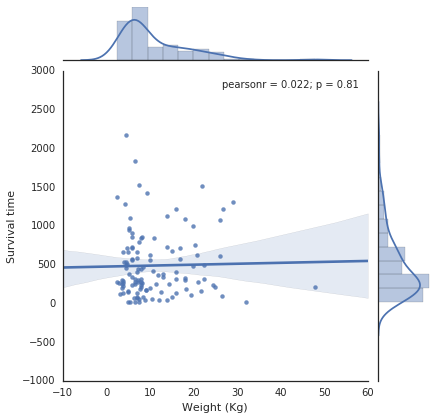

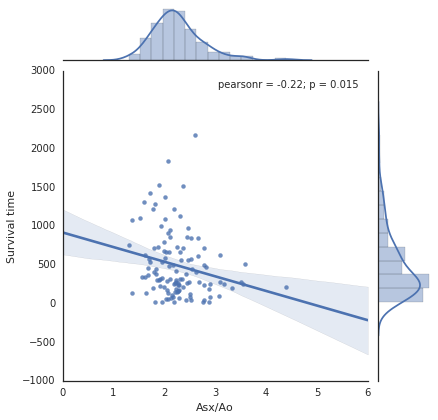

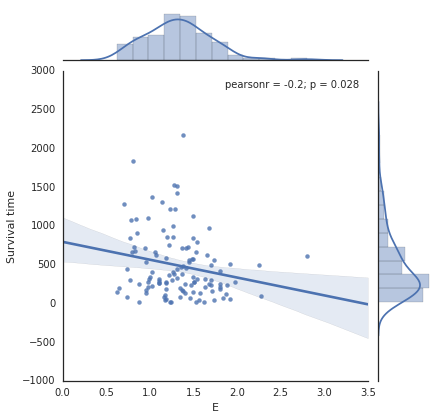

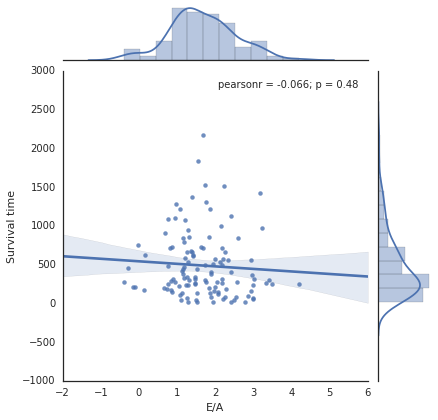

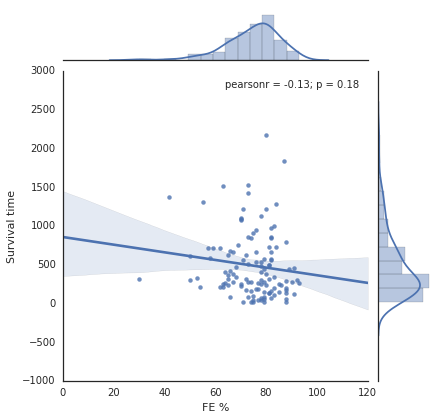

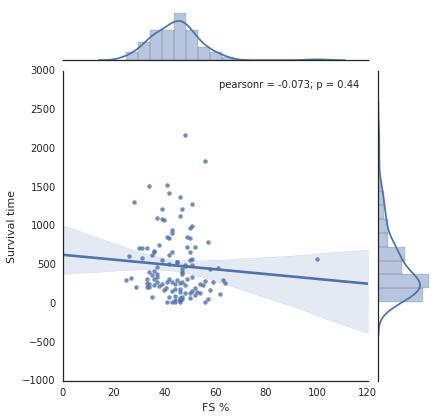

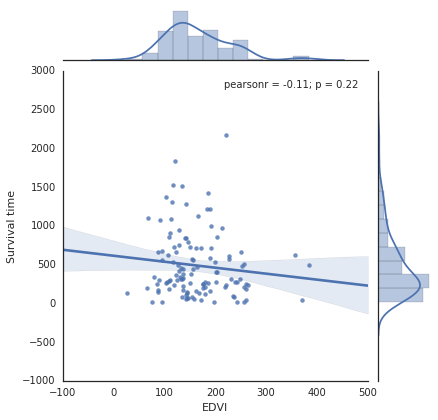

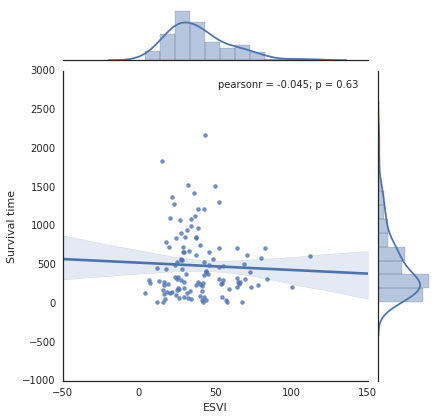

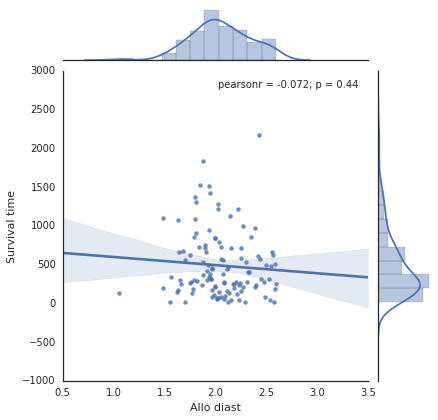

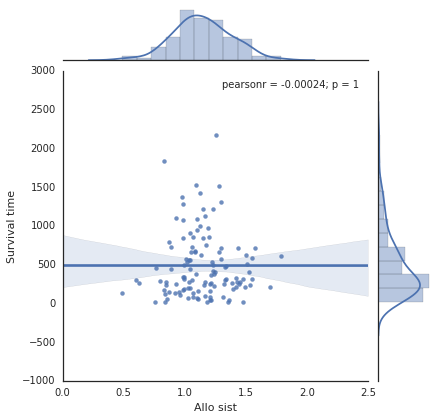

In [5]:
with sns.axes_style('white'):
    for feat in list(dogs.columns.values):
        sns.jointplot(feat, "Survival time", dogs, kind='reg')
        plt.show()

In [2]:
dogs = load_skl_dogs_2016(NApolicy='normal', censoringPolicy='drop', scaler=StandardScaler())

print("SVR with grid search model selection\n")

X, y = dogs.data, dogs.target
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 1/6)

param_grid = [
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'kernel': ['linear']},
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'degree': [1,2,3], 'coef0': [-100, -10, -1, 0, 1, 10, 100], 'kernel': ['poly']}
 ]

svreg = GridSearchCV(svm.SVR(), param_grid, cv=6, n_jobs=4)
svreg.fit(X_Train, y_Train)

print("Best parameters set found on development set:")
print(svreg.best_params_)
print("Test score: %f" % svreg.score(X_Test,y_Test))

SVR with grid search model selection

Best parameters set found on development set:
{'degree': 2, 'kernel': 'poly', 'C': 4, 'gamma': 0.1, 'coef0': -1, 'epsilon': 0.0001}
Test score: -0.199058


# Substitute censored survtime with maximum survtime of dead subjects

In [7]:
dogs = load_df_dogs_2016(dropColumns=dropNonNumeric+dropDates+dropIrrelevant, NApolicy='normal', censoringPolicy='max')
dogs.shape

(161, 18)

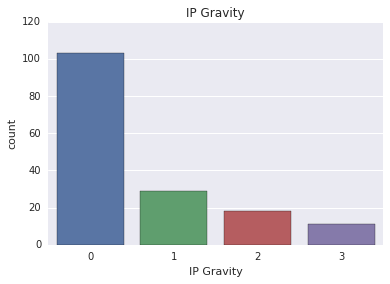

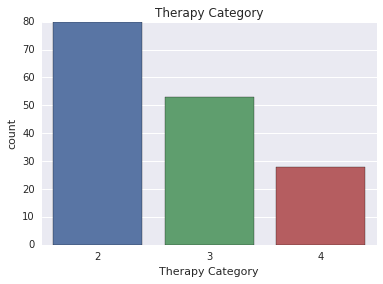

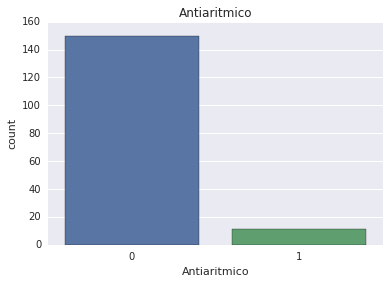

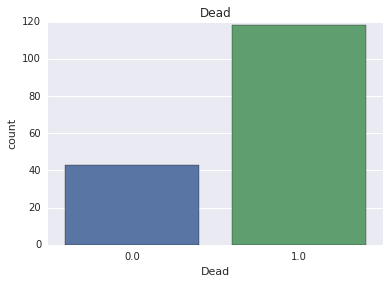

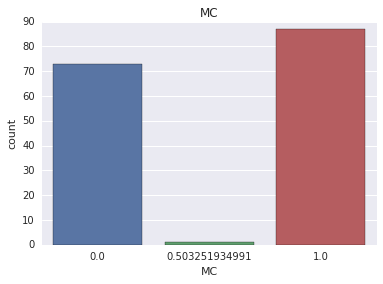

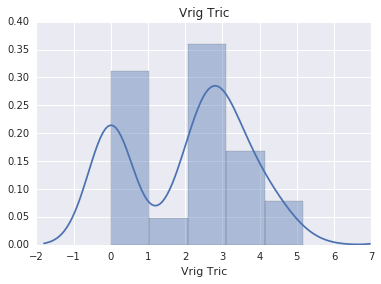

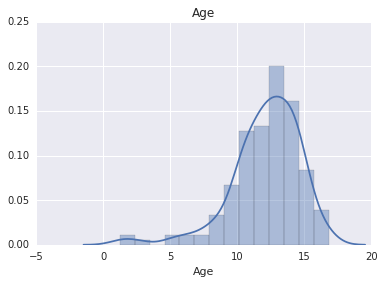

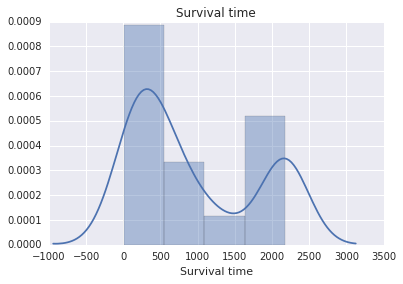

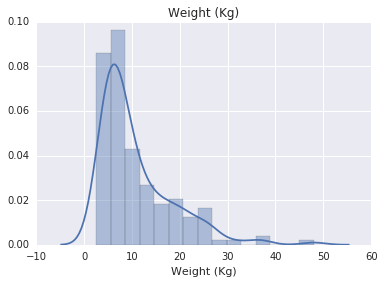

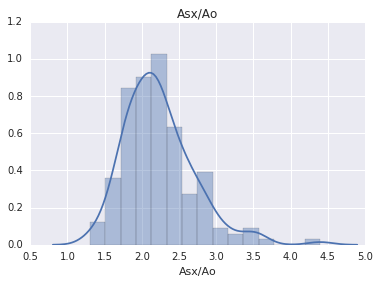

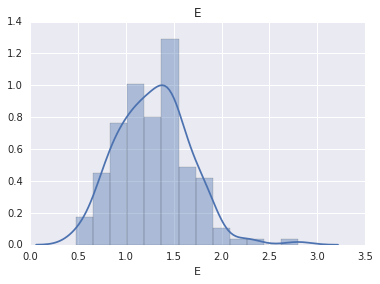

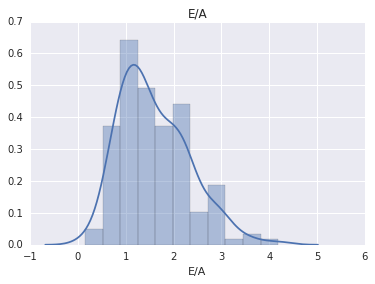

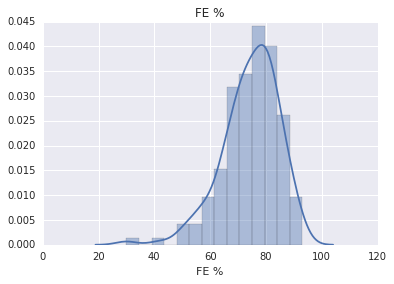

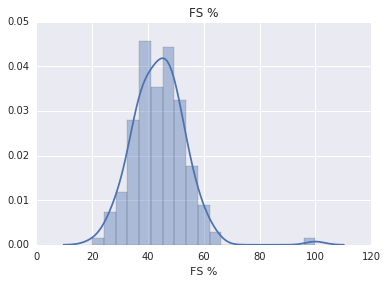

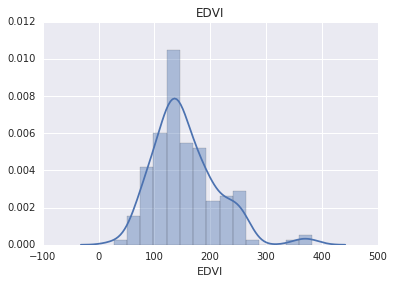

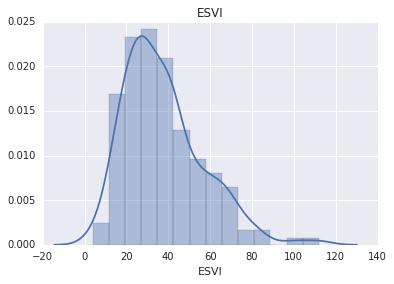

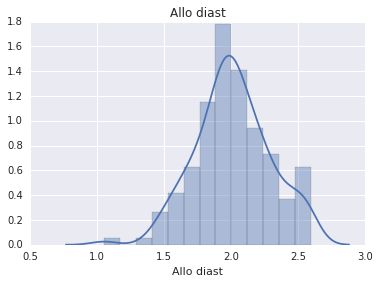

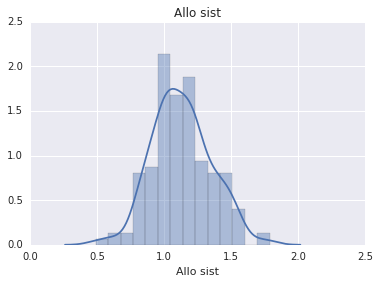

In [8]:
for categ_feat in ["IP Gravity", "Therapy Category", "Antiaritmico", "Dead", "MC"]:
    plt.title(categ_feat)
    sns.countplot(x=categ_feat, data=dogs)
    plt.show()
for feat in ["Vrig Tric", "Age", "Survival time", "Weight (Kg)", "Asx/Ao", "E", "E/A", "FE %", "FS %", "EDVI", "ESVI", "Allo diast", "Allo sist"]:
    plt.title(feat)
    sns.distplot(dogs[feat])
    plt.show()

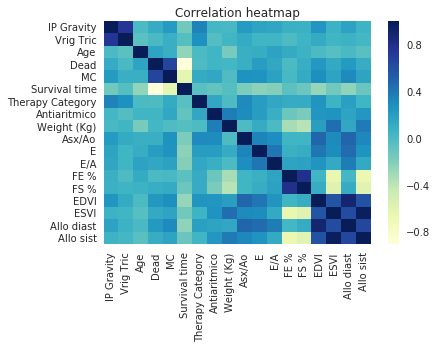

In [9]:
plt.title("Correlation heatmap")
sns.heatmap(dogs.corr(), cmap="YlGnBu")
plt.show()

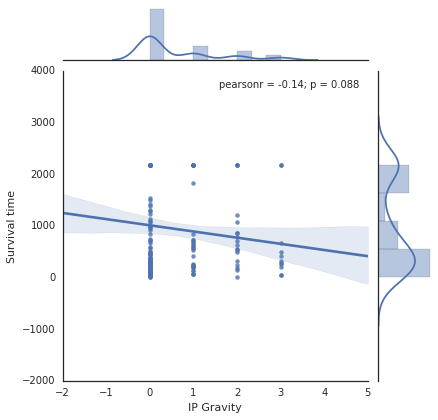

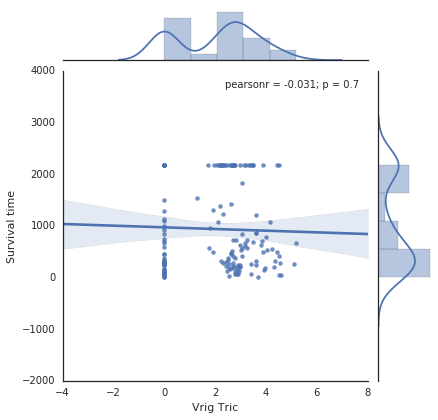

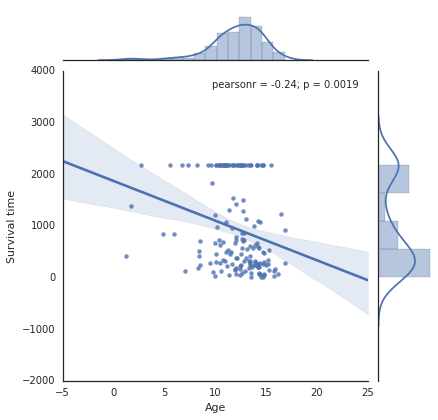

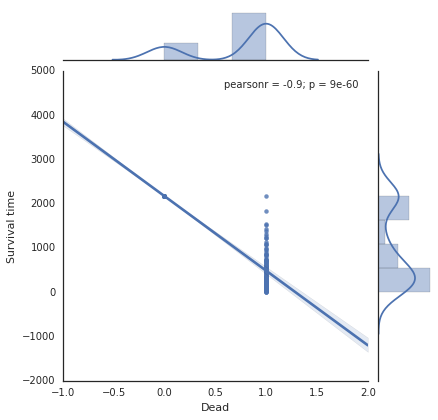

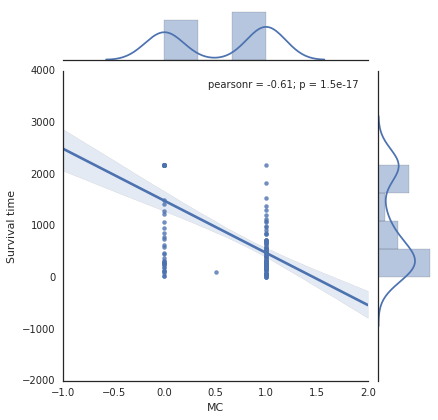

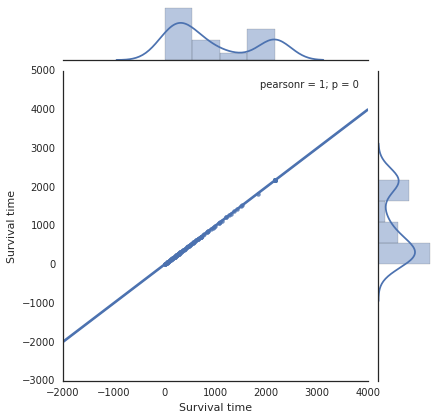

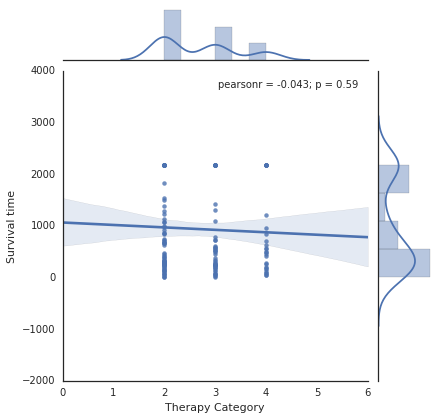

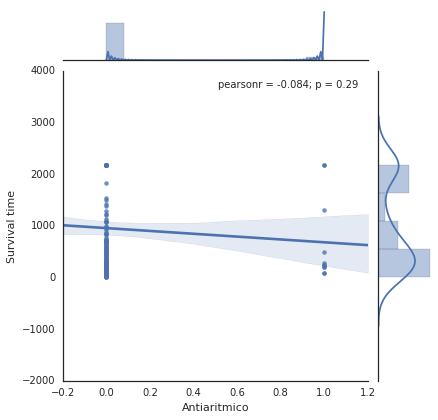

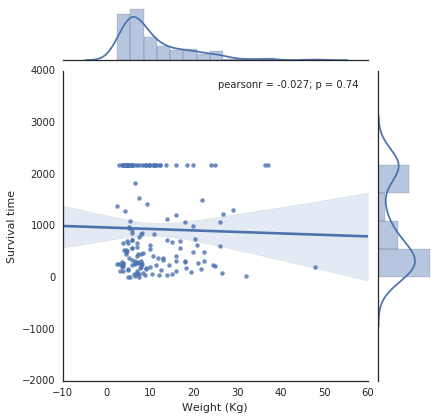

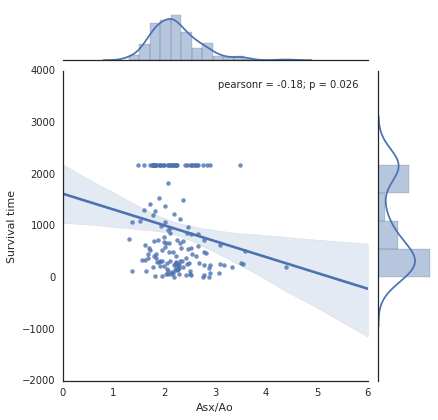

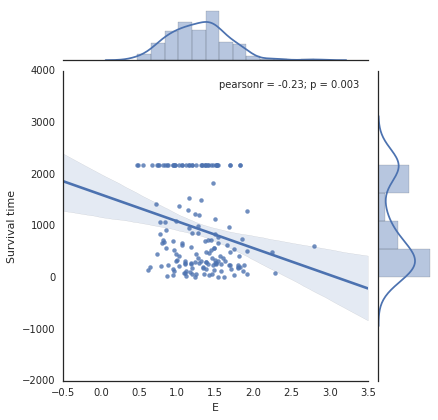

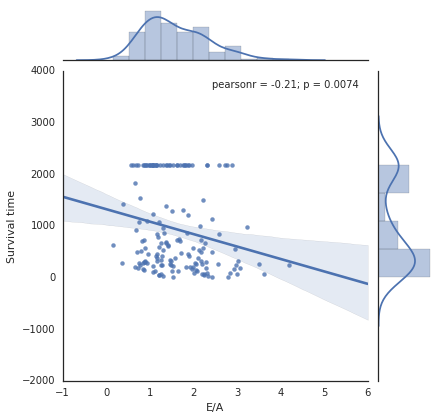

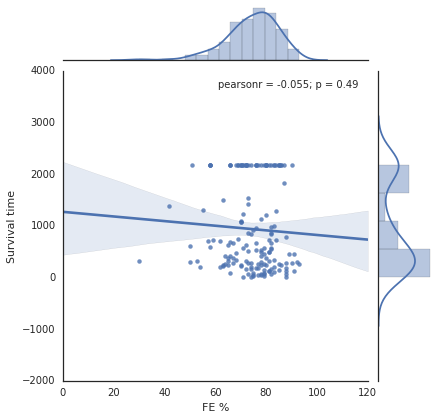

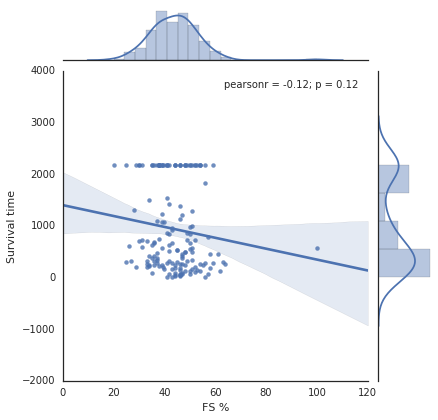

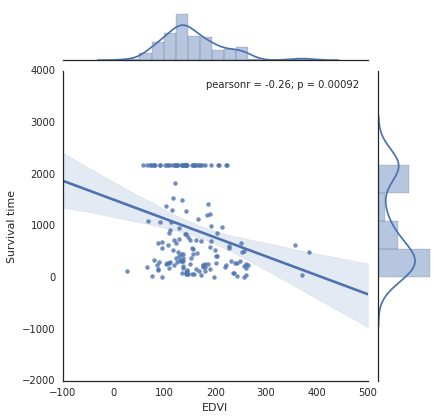

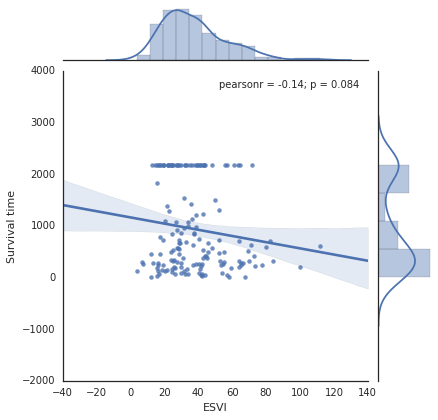

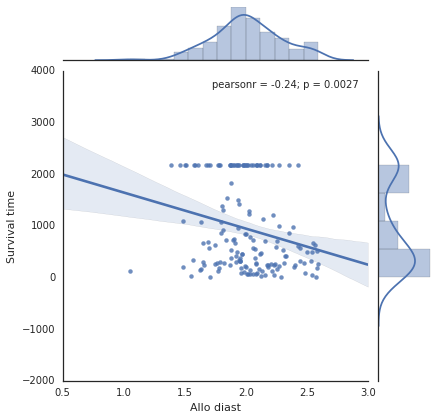

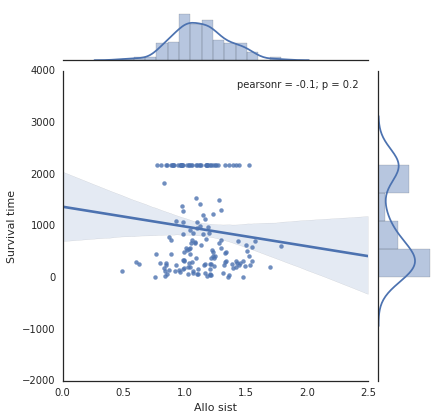

In [10]:
with sns.axes_style('white'):
    for feat in list(dogs.columns.values):
        sns.jointplot(feat, "Survival time", dogs, kind='reg')
        plt.show()

In [2]:
dogs = load_skl_dogs_2016(NApolicy='normal', censoringPolicy='max', scaler=StandardScaler())

print("SVR with grid search model selection\n")

X, y = dogs.data, dogs.target
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 1/6)

param_grid = [
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'kernel': ['linear']},
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'degree': [1,2,3], 'coef0': [0, 1, 10, 100], 'kernel': ['poly']}
 ]

svreg = GridSearchCV(svm.SVR(), param_grid, cv=6, n_jobs=4)
svreg.fit(X_Train, y_Train)

print("Best parameters set found on development set:")
print(svreg.best_params_)
print("Test score: %f" % svreg.score(X_Test,y_Test))

SVR with grid search model selection

Best parameters set found on development set:
{'C': 4, 'coef0': 10, 'degree': 3, 'epsilon': 10, 'gamma': 0.001, 'kernel': 'poly'}
Test score: -0.255149
